# NETWORK ANALYSIS OF SHAKESPEARE'S HAMLET
### Part I: Hamlet Networks and Centralities
## By Moses Boudourides & Sergios Lenis

In [59]:
%matplotlib inline 
%load_ext autoreload
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Text Preparation

The text file of Shakespeare's Hamlet ('corpora/ShakespeareHamletOrig_from_PG.txt') was downloaded from Project Gutenberg and it was modified in such a way that all the names of characters (as "actors" in the social networks sense) appear as such in a uniform way. This modified text ('corpora/HamletShakespeare.txt') is the one processed here.

In [60]:
fileName = 'corpora/HamletShakespeare.txt'
f=open(fileName,'r')
f.seek(765)
hamlet=f.read(290)
print hamlet

Hamlet, Prince of Denmark

by William Shakespeare [Collins edition]

November, 1998 [Etext #1524]
Most recently updated: January 26, 2009


Project Gutenberg Etext of Hamlet by Shakespeare
******This file should be named 1524.txt or 1524.zip******

This etext was prepared by Dianne Bean.




In [61]:
f.seek(0)
for i in range(324):
    if i < 286:
        chars=f.readline()
    else:
        print f.readline()        

HAMLET, PRINCE OF DENMARK



by William Shakespeare





Claudius, King of Denmark.

Hamlet, Son to the former, and Nephew to the present King

Polonius, Lord Chamberlain.

Horatio, Friend to Hamlet.

Laertes, Son to Polonius.

Voltimand, Courtier.

Cornelius, Courtier.

Rosencrantz, Courtier.

Guildenstern, Courtier.

Osric, Courtier.

A Gentleman, Courtier.

A Priest

Marcellus, Officer.

Bernardo, Officer.

Francisco, a Soldier

Reynaldo, Servant to Polonius.

Players

Two Clowns

Grave-diggers

Fortinbras, Prince of Norway.

A Captain.

English Ambassadors.

Ghost of Hamlet's Father.

Gertrude, Queen of Denmark, and Mother of Hamlet.

Ophelia, Daughter to Polonius.



Lords

Ladies

Officers

Soldiers

Sailors

Messengers, and other Attendants.





In [62]:
%autoreload 2
from testy import *
from syntheticThreeLayerGraph_time import synthetic_multi_level_dict,plot_graph_dict,plot_graph_k_n, plot_total_graph_with_weights

act_dict,u,pers_l,pers_dict,pact,lact=create_dict_of_acts(fileName)

print 'Characters (actors) appearing in Hamlet:'
print
for actor in pers_l:
    print actor
print
print 'The number of characters (actors) in Hamlet is', len(pers_l)

Characters (actors) appearing in Hamlet:

King
Hamlet
Polonius
Horatio
Laertes
Voltimand
Cornelius
Rosencrantz
Guildenstern
Osric
Gentleman
1 Priest
Marcellus
Bernardo
Francisco
Reynaldo
1 Clown
2 Clown
Fortinbras
Captain
Ghost
Queen
Ophelia
Sailor
Messenger

The number of characters (actors) in Hamlet is 25


## Detection of characters (actors) and conversational relationships (ties) among them

The relationship (tie) among the above characters (actors) detected (automatically) here is the so-called "conversational relationship" which is defined whenever two characters are co-participating in a conversation. Actually, due to the structure of Shakespeare's printed text (in Project Gutenberg), the unit of conversation (or conversational chunk) used here is the body of the text which is delimited between two empty lines. In this way, the resulting network is represented by a weighted undirected graph, where tha weight of a edge joining two characters is the total number of conversational chaunks that these characters are involved in. Moreover, we are decomposing the network into slices (or layers) according to one of the five Acts during which the measured coversations take place.

In [63]:
graph_dic,ract_dic,pernode_dict,nodper_dic,cnum=create_graph_dict(act_dict,pers_l,pers_dict,u)
G, list_of_Graphs_final, Gagr, edgeList ,nmap ,mapping,k,n=synthetic_multi_level_dict(graph_dic,pernode_dict,nodper_dic,ract_dic,No_isolates=True)
conver_rel = 0
pos_dict={}
for k,v in graph_dic.items():
    print nx.info(v)
    conver_rel += len(v.edges())
    print
    
print 'Characters (actors) appearing in Hamlet in all conversational relationships in all Acts:'  
print
for i in pernode_dict:
    print i
print
print 'The total number of characters (actors) appearing in Hamlet in all conversational relationships in all Acts is', len(pernode_dict.keys())
print 
print 'The total number of conversational relationships (edges) among characters (actors) \
taking place in all Acts of Hamlet is', conver_rel

Name: Act I
Type: Graph
Number of nodes: 24
Number of edges: 23
Average degree:   1.9167

Name: Act II
Type: Graph
Number of nodes: 24
Number of edges: 15
Average degree:   1.2500

Name: Act IV
Type: Graph
Number of nodes: 24
Number of edges: 18
Average degree:   1.5000

Name: Act III
Type: Graph
Number of nodes: 24
Number of edges: 10
Average degree:   0.8333

Name: Act V
Type: Graph
Number of nodes: 24
Number of edges: 17
Average degree:   1.4167

Characters (actors) appearing in Hamlet in all conversational relationships in all Acts:

Laertes
Gentleman
Messenger
Marcellus
1 Priest
Francisco
Bernardo
Ophelia
1 Clown
Voltimand
Polonius
Ghost
King
Horatio
Fortinbras
Reynaldo
Osric
Guildenstern
Rosencrantz
Queen
Hamlet
Sailor
2 Clown
Captain

The total number of characters (actors) appearing in Hamlet in all conversational relationships in all Acts is 24

The total number of conversational relationships (edges) among characters (actors) taking place in all Acts of Hamlet is 83


## Hamlet Network Visualizations

The number of actors in Hamlet's Act I is 13
The number of conversational relationships in Hamlet's Act I is 23


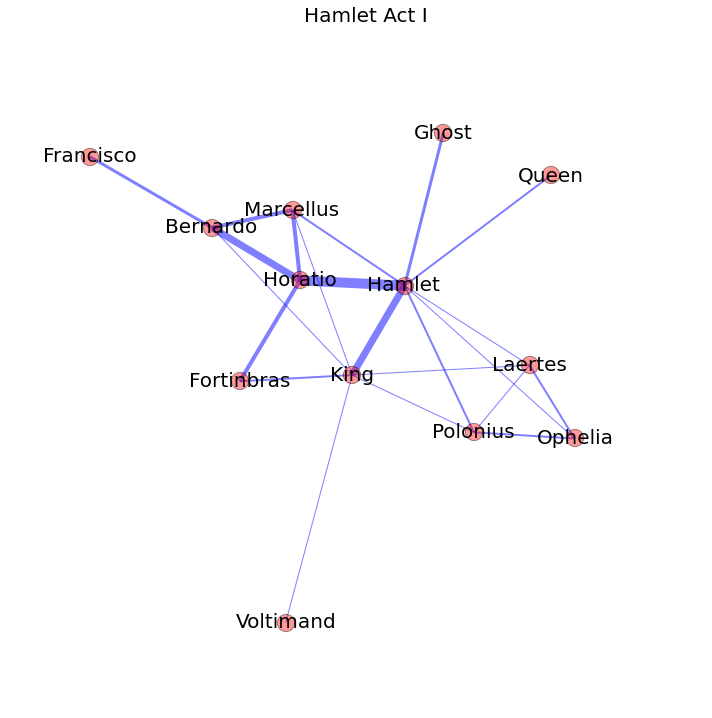

In [74]:
GI = graph_dic[ract_dic[cnum[0]]]
print "The number of actors in Hamlet's Act I is", len(GI.nodes())
print "The number of conversational relationships in Hamlet's Act I is", len(GI.edges())

GI.remove_nodes_from(nx.isolates(GI))
labels={i:v for v,i in pernode_dict.items() if i in GI.nodes()}
weights={(i[0],i[1]):i[2]['weight'] for i in GI.edges(data=True) }#if all((i[0],i[1])) in G.nodes() }
plt.figure(figsize=(12,12))
pos=nx.spring_layout(GI,scale=50)
pos_dict[0]=pos
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(GI,pos=pos,with_labels=False,alpha=0.4)
labe=nx.draw_networkx_labels(GI,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(GI,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=0.2)
plt.title("Hamlet Act I",fontsize=20)
kk=plt.axis('off')

The number of actors in Hamlet's Act II is 10
The number of conversational relationships in Hamlet's Act II is 15


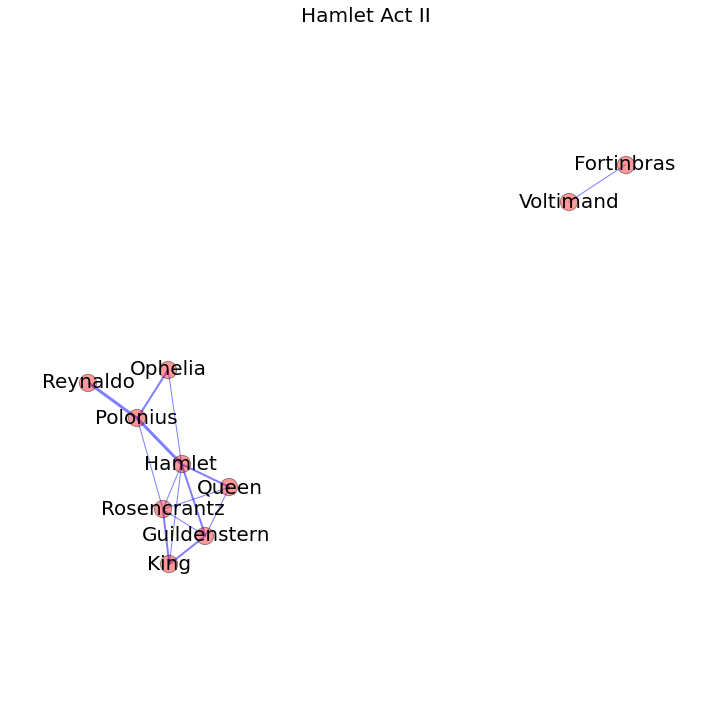

In [86]:
GI = graph_dic[ract_dic[cnum[1]]]
print "The number of actors in Hamlet's Act II is", len(GI.nodes())
print "The number of conversational relationships in Hamlet's Act II is", len(GI.edges())

GI.remove_nodes_from(nx.isolates(GI))
labels={i:v for v,i in pernode_dict.items() if i in GI.nodes()}
weights={(i[0],i[1]):i[2]['weight'] for i in GI.edges(data=True) }#if all((i[0],i[1])) in G.nodes() }
plt.figure(figsize=(12,12))
pos=nx.spring_layout(GI,scale=50)
pos_dict[1]=pos
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(GI,pos=pos,with_labels=False,alpha=0.4)
labe=nx.draw_networkx_labels(GI,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(GI,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=0.2)
plt.title("Hamlet Act II",fontsize=20)
kk=plt.axis('off')

The number of actors in Hamlet's Act III is 24
The number of conversational relationships in Hamlet's Act III is 10


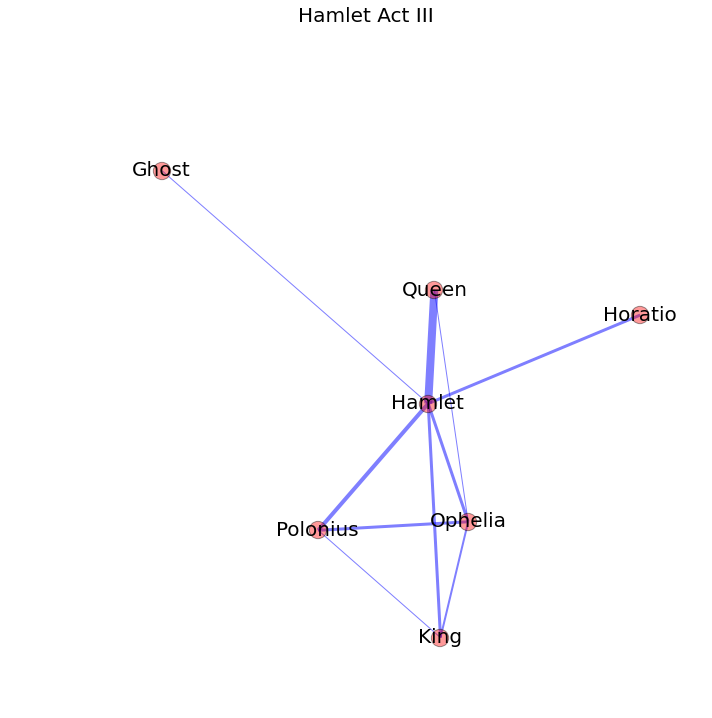

In [66]:
GI = graph_dic[ract_dic[cnum[2]]]
print "The number of actors in Hamlet's Act III is", len(GI.nodes())
print "The number of conversational relationships in Hamlet's Act III is", len(GI.edges())

GI.remove_nodes_from(nx.isolates(GI))
labels={i:v for v,i in pernode_dict.items() if i in GI.nodes()}
weights={(i[0],i[1]):i[2]['weight'] for i in GI.edges(data=True) }#if all((i[0],i[1])) in G.nodes() }
plt.figure(figsize=(12,12))
pos=nx.spring_layout(GI,scale=50)
pos_dict[2]=pos
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(GI,pos=pos,with_labels=False,alpha=0.4)
labe=nx.draw_networkx_labels(GI,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(GI,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=0.2)
plt.title("Hamlet Act III",fontsize=20)
kk=plt.axis('off')

The number of actors in Hamlet's Act IV is 14
The number of conversational relationships in Hamlet's Act IV is 18


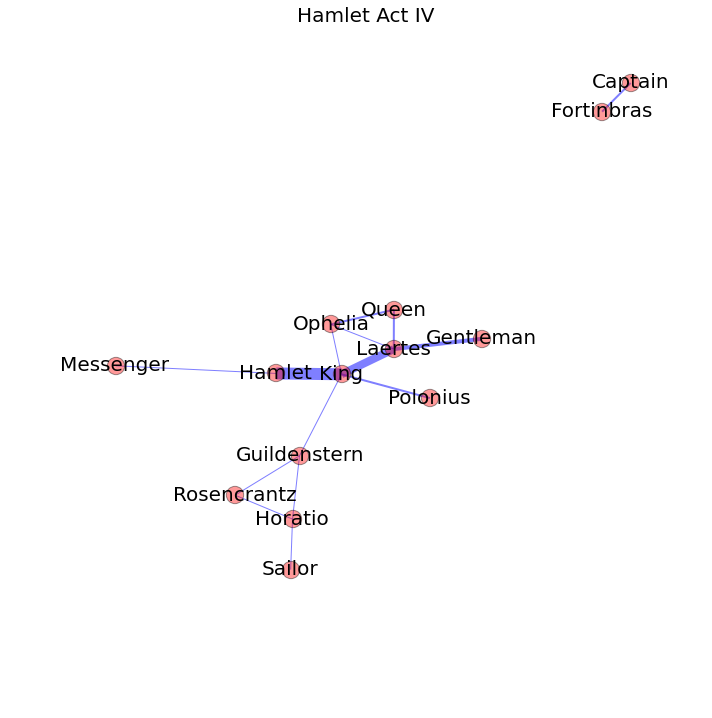

In [93]:
GI = graph_dic[ract_dic[cnum[3]]]
print "The number of actors in Hamlet's Act IV is", len(GI.nodes())
print "The number of conversational relationships in Hamlet's Act IV is", len(GI.edges())

GI.remove_nodes_from(nx.isolates(GI))
labels={i:v for v,i in pernode_dict.items() if i in GI.nodes()}
weights={(i[0],i[1]):i[2]['weight'] for i in GI.edges(data=True) }#if all((i[0],i[1])) in G.nodes() }
plt.figure(figsize=(12,12))
pos=nx.spring_layout(GI,scale=50)
pos_dict[3]=pos
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(GI,pos=pos,with_labels=False,alpha=0.4)
labe=nx.draw_networkx_labels(GI,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(GI,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=0.2)
plt.title("Hamlet Act IV",fontsize=20)
kk=plt.axis('off')

The number of actors in Hamlet's Act V is 24
The number of conversational relationships in Hamlet's Act V is 17


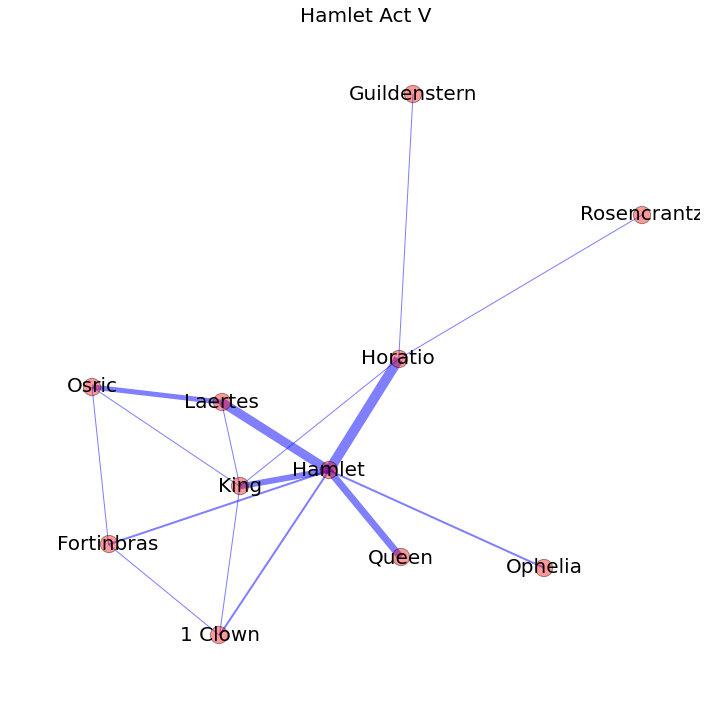

In [68]:
GI = graph_dic[ract_dic[cnum[4]]]
print "The number of actors in Hamlet's Act V is", len(GI.nodes())
print "The number of conversational relationships in Hamlet's Act V is", len(GI.edges())

GI.remove_nodes_from(nx.isolates(GI))
labels={i:v for v,i in pernode_dict.items() if i in GI.nodes()}
weights={(i[0],i[1]):i[2]['weight'] for i in GI.edges(data=True) }#if all((i[0],i[1])) in G.nodes() }
plt.figure(figsize=(12,12))
pos=nx.spring_layout(GI,scale=50)
pos_dict[4]=pos
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(GI,pos=pos,with_labels=False,alpha=0.4)
labe=nx.draw_networkx_labels(GI,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(GI,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=0.2)
plt.title("Hamlet Act V",fontsize=20)
kk=plt.axis('off')

The number of actors in Hamlet Network (all Acts) is 22
The number of conversational relationships in Hamlet Network (all Acts) is 52


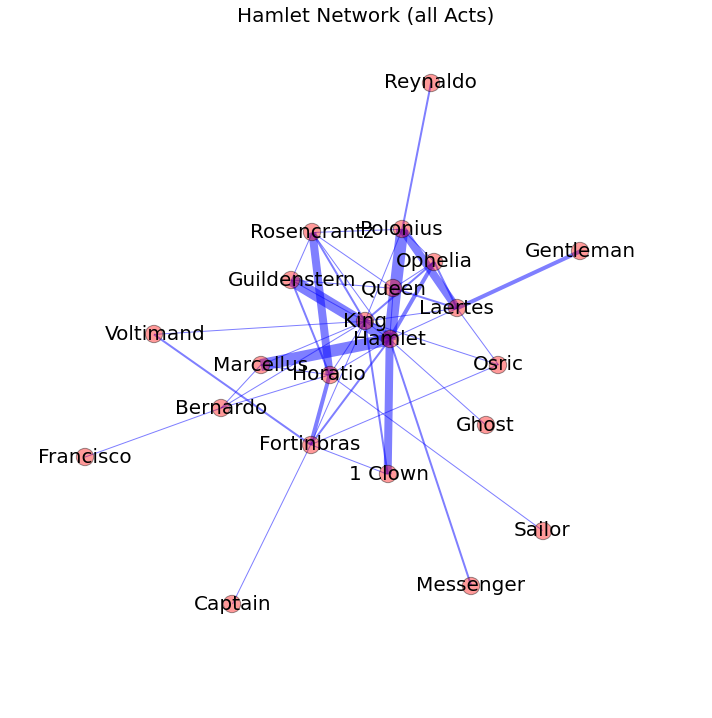

In [115]:
G=plot_total_graph_with_weights(graph_dic,nodper_dic)
weights={(nd[0],nd[1]):str(nd[2]['weight']) for nd in G.edges(data=True)}
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
print "The number of actors in Hamlet Network (all Acts) is", len(G.nodes())
print "The number of conversational relationships in Hamlet Network (all Acts) is", len(G.edges())

# print labels
plt.figure(figsize=(12,12))
pos=nx.spring_layout(G,scale=50)
pos_dict[5]=pos
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Hamlet Network (all Acts)",fontsize=20)
kk=plt.axis('off')

## Hamlet Network Centralities

### Degree Centrality

Hamlet has degree centrality 0.833333333333
King has degree centrality 0.583333333333
Horatio has degree centrality 0.333333333333
Ophelia has degree centrality 0.25
Fortinbras has degree centrality 0.166666666667
Queen has degree centrality 0.0833333333333


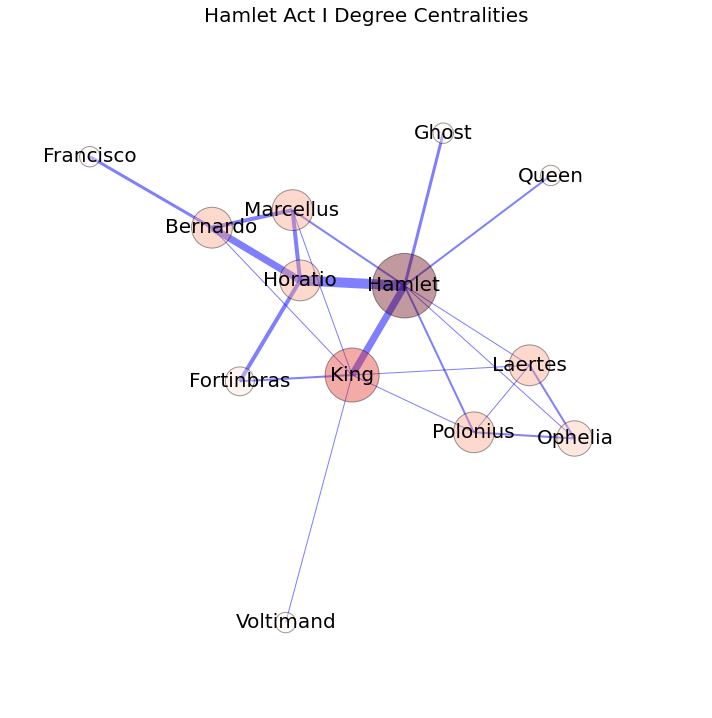

In [78]:
G = graph_dic[ract_dic[cnum[0]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
dc = nx.degree_centrality(G)
dcs={}
for k,v in dc.items():
    dcs[v]=k
for k in sorted(dcs,reverse=True):
    print labels[dcs[k]], 'has degree centrality', k
pos=pos_dict[0]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=dc.keys(),
                       node_size = [d*5000 for d in dc.values()],node_color=dc.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Hamlet Act I Degree Centralities",fontsize=20)
kk=plt.axis('off')

Hamlet has degree centrality 0.666666666667
Rosencrantz has degree centrality 0.555555555556
Guildenstern has degree centrality 0.444444444444
Queen has degree centrality 0.333333333333
Ophelia has degree centrality 0.222222222222
Reynaldo has degree centrality 0.111111111111


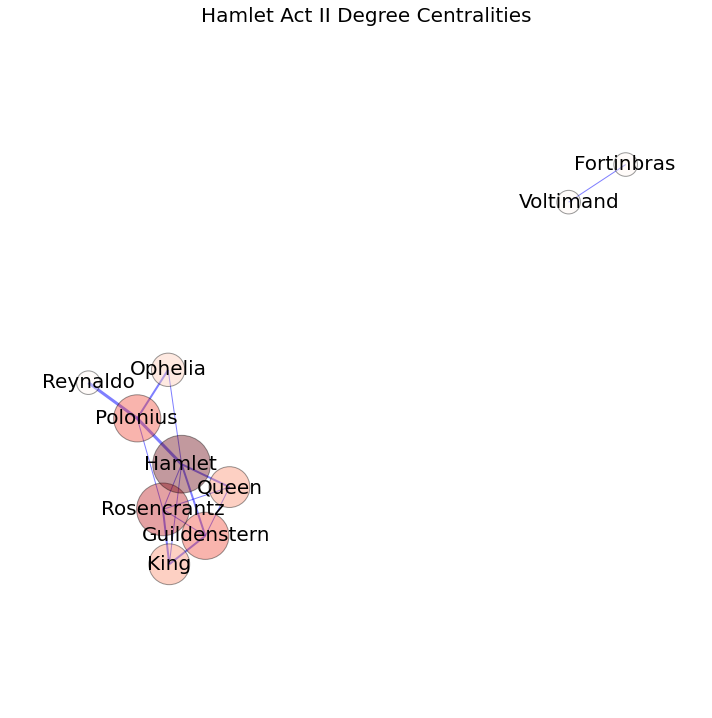

In [87]:
G = graph_dic[ract_dic[cnum[1]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
# dc = nx.degree_centrality(G)
# for k,v in dc.items():
#     print labels[k], 'has degree centrality', v
dc = nx.degree_centrality(G)
dcs={}
for k,v in dc.items():
    dcs[v]=k
for k in sorted(dcs,reverse=True):
    print labels[dcs[k]], 'has degree centrality', k
pos=pos_dict[1]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=dc.keys(),
                       node_size = [d*5000 for d in dc.values()],node_color=dc.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Hamlet Act II Degree Centralities",fontsize=20)
kk=plt.axis('off')

Hamlet has degree centrality 1.0
Ophelia has degree centrality 0.666666666667
King has degree centrality 0.5
Queen has degree centrality 0.333333333333
Horatio has degree centrality 0.166666666667


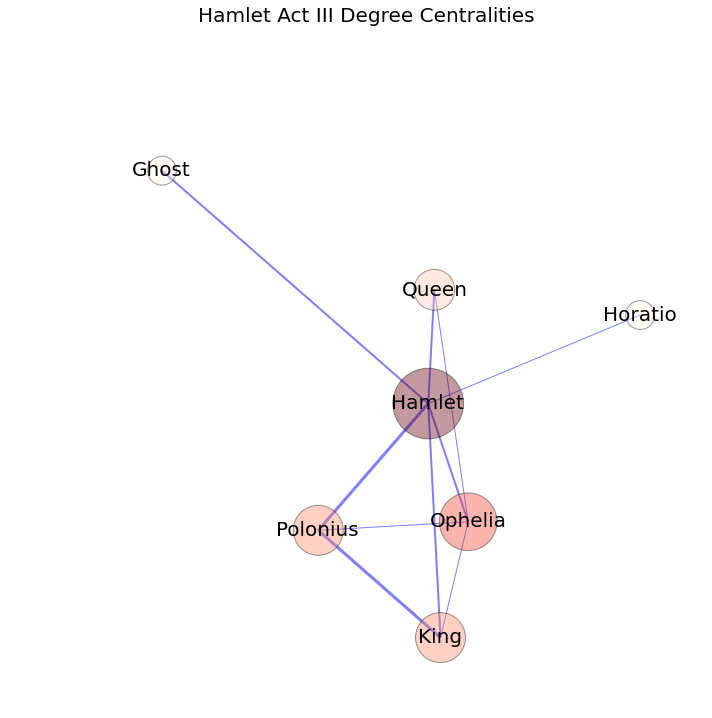

In [88]:
G = graph_dic[ract_dic[cnum[2]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
dc = nx.degree_centrality(G)
dcs={}
for k,v in dc.items():
    dcs[v]=k
for k in sorted(dcs,reverse=True):
    print labels[dcs[k]], 'has degree centrality', k
pos=pos_dict[2]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=dc.keys(),
                       node_size = [d*5000 for d in dc.values()],node_color=dc.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Hamlet Act III Degree Centralities",fontsize=20)
kk=plt.axis('off')

Horatio has degree centrality 0.384615384615
Hamlet has degree centrality 0.307692307692
Guildenstern has degree centrality 0.230769230769
Queen has degree centrality 0.153846153846
Captain has degree centrality 0.0769230769231


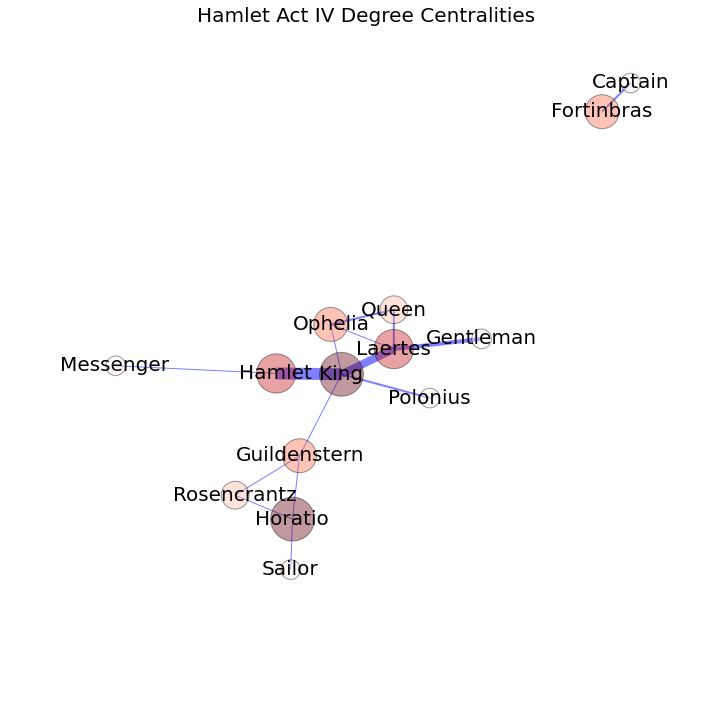

In [94]:
G = graph_dic[ract_dic[cnum[3]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
dc = nx.degree_centrality(G)
dcs={}
for k,v in dc.items():
    dcs[v]=k
for k in sorted(dcs,reverse=True):
    print labels[dcs[k]], 'has degree centrality', k
pos=pos_dict[3]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=dc.keys(),
                       node_size = [d*5000 for d in dc.values()],node_color=dc.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Hamlet Act IV Degree Centralities",fontsize=20)
kk=plt.axis('off')

Hamlet has degree centrality 0.9
King has degree centrality 0.5
Horatio has degree centrality 0.4
Osric has degree centrality 0.3
Queen has degree centrality 0.1


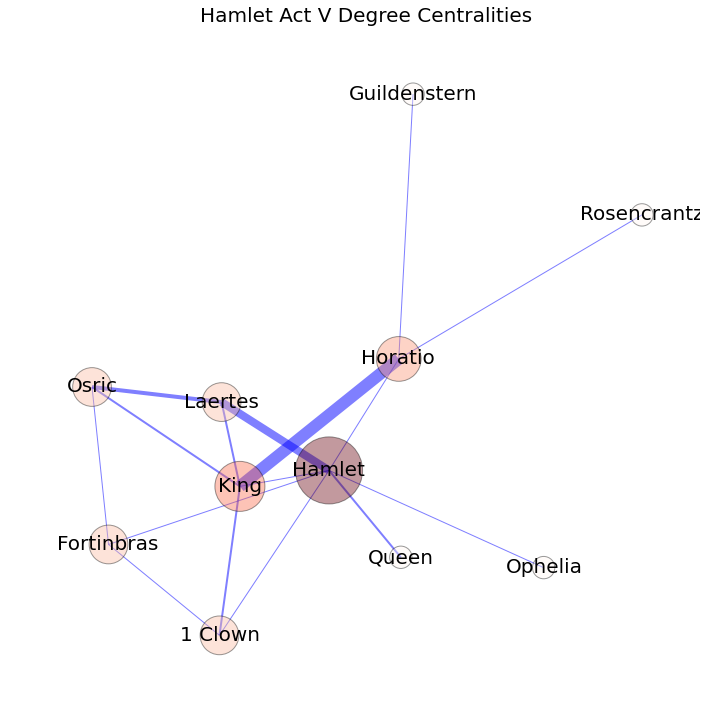

In [95]:
G = graph_dic[ract_dic[cnum[4]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
dc = nx.degree_centrality(G)
dcs={}
for k,v in dc.items():
    dcs[v]=k
for k in sorted(dcs,reverse=True):
    print labels[dcs[k]], 'has degree centrality', k
pos=pos_dict[4]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=dc.keys(),
                       node_size = [d*5000 for d in dc.values()],node_color=dc.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Hamlet Act V Degree Centralities",fontsize=20)
kk=plt.axis('off')

Hamlet has degree centrality 0.714285714286
King has degree centrality 0.619047619048
Horatio has degree centrality 0.47619047619
Fortinbras has degree centrality 0.428571428571
Laertes has degree centrality 0.333333333333
Rosencrantz has degree centrality 0.285714285714
Queen has degree centrality 0.238095238095
Bernardo has degree centrality 0.190476190476
Osric has degree centrality 0.142857142857
Voltimand has degree centrality 0.0952380952381
Captain has degree centrality 0.047619047619


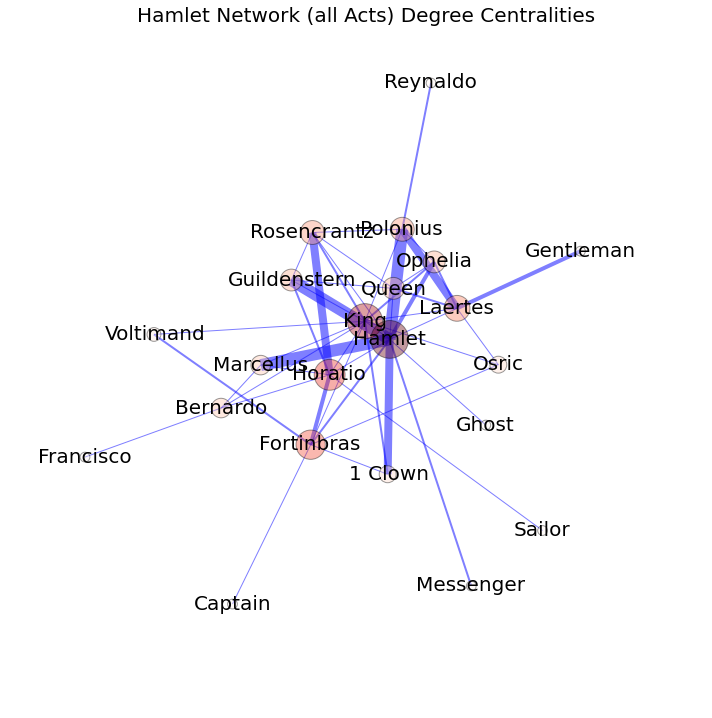

In [116]:
G=plot_total_graph_with_weights(graph_dic,nodper_dic)
weights={(nd[0],nd[1]):str(nd[2]['weight']) for nd in G.edges(data=True)}
# G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
dc = nx.degree_centrality(G)
dcs={}
for k,v in dc.items():
    dcs[v]=k
for k in sorted(dcs,reverse=True):
    print labels[dcs[k]], 'has degree centrality', k
pos=pos_dict[5]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=dc.keys(),
                       node_size = [d*2000 for d in dc.values()],node_color=dc.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Hamlet Network (all Acts) Degree Centralities",fontsize=20)
kk=plt.axis('off')

### Closeness Centrality

Hamlet has closeness centrality 0.705882352941
Marcellus has closeness centrality 0.6
Horatio has closeness centrality 0.571428571429
Bernardo has closeness centrality 0.521739130435
Fortinbras has closeness centrality 0.461538461538
Queen has closeness centrality 0.428571428571
Francisco has closeness centrality 0.352941176471


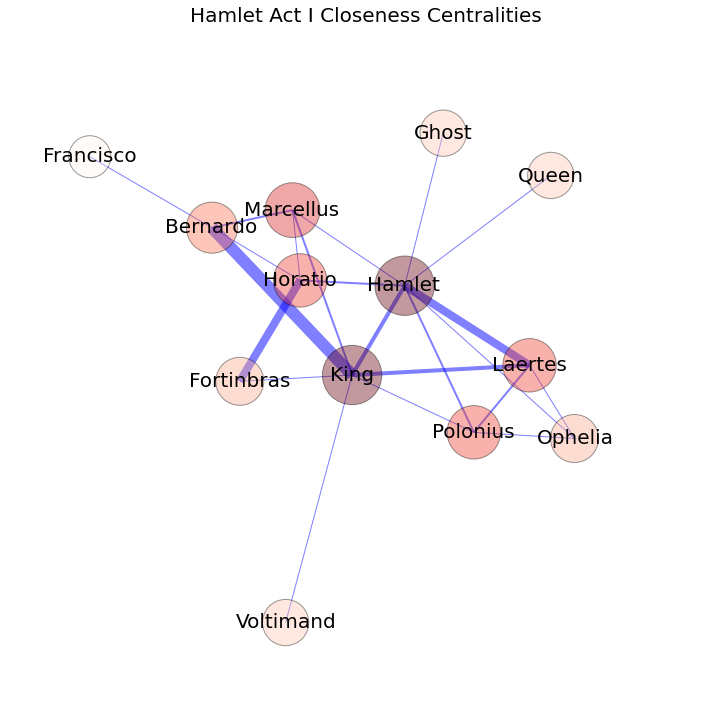

In [124]:
G = graph_dic[ract_dic[cnum[0]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
cl = nx.closeness_centrality(G)
cls={}
for k,v in cl.items():
    cls[v]=k
for k in sorted(cls,reverse=True):
    print labels[cls[k]], 'has closeness centrality', k
pos=pos_dict[0]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=cl.keys(),
                       node_size = [d*5000 for d in cl.values()],node_color=cl.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Hamlet Act I Closeness Centralities",fontsize=20)
kk=plt.axis('off')

Hamlet has closeness centrality 0.680555555556
Rosencrantz has closeness centrality 0.604938271605
Polonius has closeness centrality 0.544444444444
Guildenstern has closeness centrality 0.494949494949
Queen has closeness centrality 0.453703703704
Reynaldo has closeness centrality 0.340277777778
Fortinbras has closeness centrality 0.111111111111


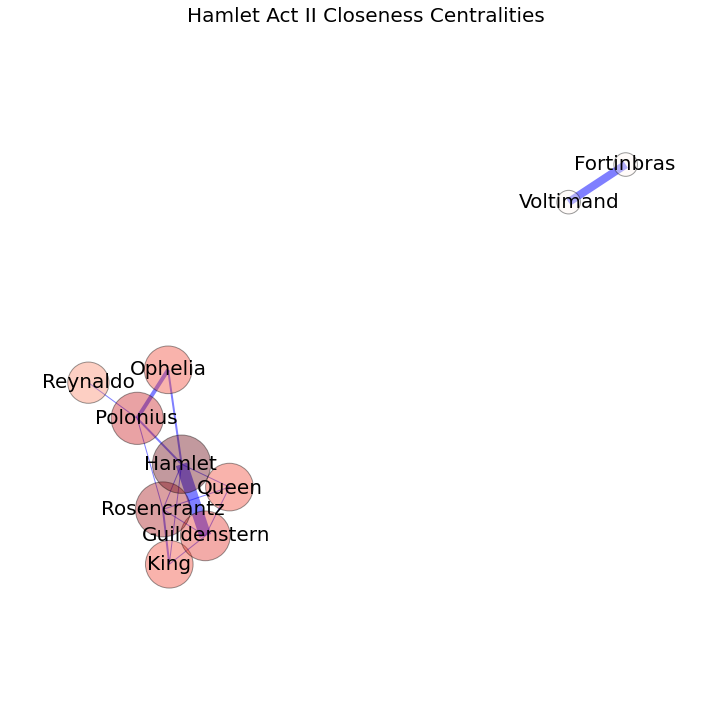

In [125]:
G = graph_dic[ract_dic[cnum[1]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
cl = nx.closeness_centrality(G)
cls={}
for k,v in cl.items():
    cls[v]=k
for k in sorted(cls,reverse=True):
    print labels[cls[k]], 'has closeness centrality', k
pos=pos_dict[1]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=cl.keys(),
                       node_size = [d*5000 for d in cl.values()],node_color=cl.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Hamlet Act II Closeness Centralities",fontsize=20)
kk=plt.axis('off')

Hamlet has closeness centrality 1.0
Ophelia has closeness centrality 0.75
King has closeness centrality 0.666666666667
Queen has closeness centrality 0.6
Horatio has closeness centrality 0.545454545455


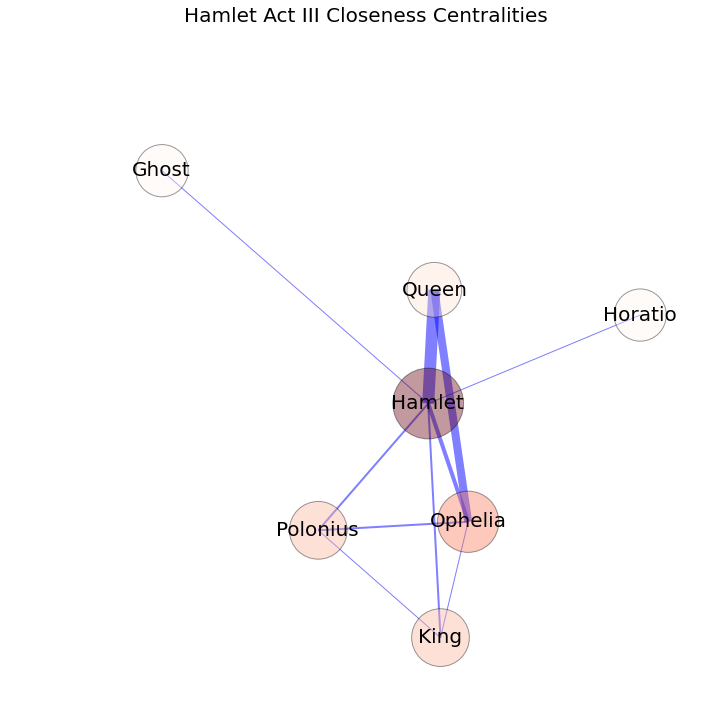

In [126]:
G = graph_dic[ract_dic[cnum[2]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
cl = nx.closeness_centrality(G)
cls={}
for k,v in cl.items():
    cls[v]=k
for k in sorted(cls,reverse=True):
    print labels[cls[k]], 'has closeness centrality', k
pos=pos_dict[2]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=cl.keys(),
                       node_size = [d*5000 for d in cl.values()],node_color=cl.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Hamlet Act III Closeness Centralities",fontsize=20)
kk=plt.axis('off')

Laertes has closeness centrality 0.404682274247
Gentleman has closeness centrality 0.282051282051
Messenger has closeness centrality 0.258547008547
Ophelia has closeness centrality 0.387820512821
Polonius has closeness centrality 0.332417582418
King has closeness centrality 0.517094017094
Horatio has closeness centrality 0.320954907162
Fortinbras has closeness centrality 0.0769230769231
Guildenstern has closeness centrality 0.423076923077
Rosencrantz has closeness centrality 0.310256410256
Queen has closeness centrality 0.290865384615
Hamlet has closeness centrality 0.35798816568
Sailor has closeness centrality 0.23865877712
Captain has closeness centrality 0.0769230769231


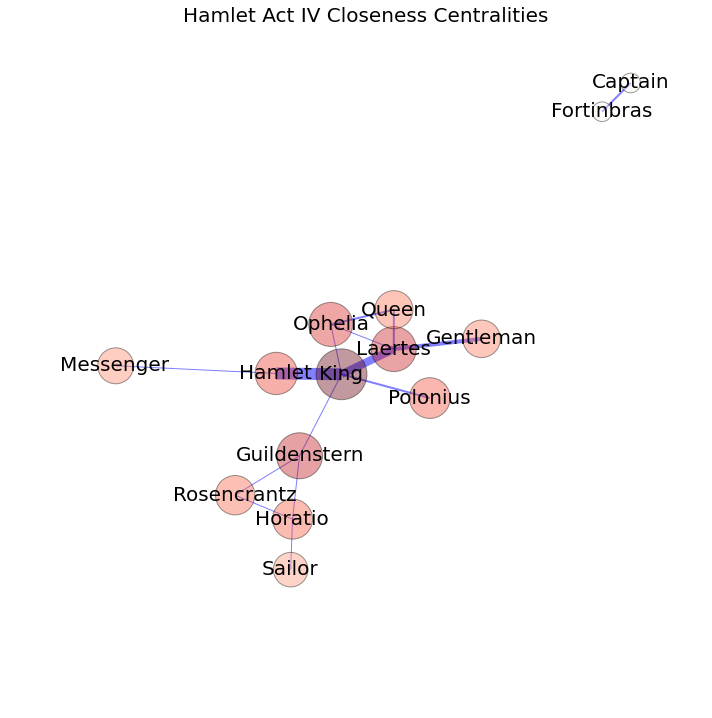

In [120]:
G = graph_dic[ract_dic[cnum[3]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
cl = nx.closeness_centrality(G)
for k,v in cl.items():
    print labels[k], 'has closeness centrality', v
# pos=nx.spring_layout(G,scale=50)
pos=pos_dict[3]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=cl.keys(),
                       node_size = [d*5000 for d in cl.values()],node_color=cl.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Hamlet Act IV Closeness Centralities",fontsize=20)
kk=plt.axis('off')

Hamlet has closeness centrality 0.769230769231
King has closeness centrality 0.666666666667
Horatio has closeness centrality 0.625
Fortinbras has closeness centrality 0.526315789474
Osric has closeness centrality 0.47619047619
Queen has closeness centrality 0.454545454545
Rosencrantz has closeness centrality 0.4


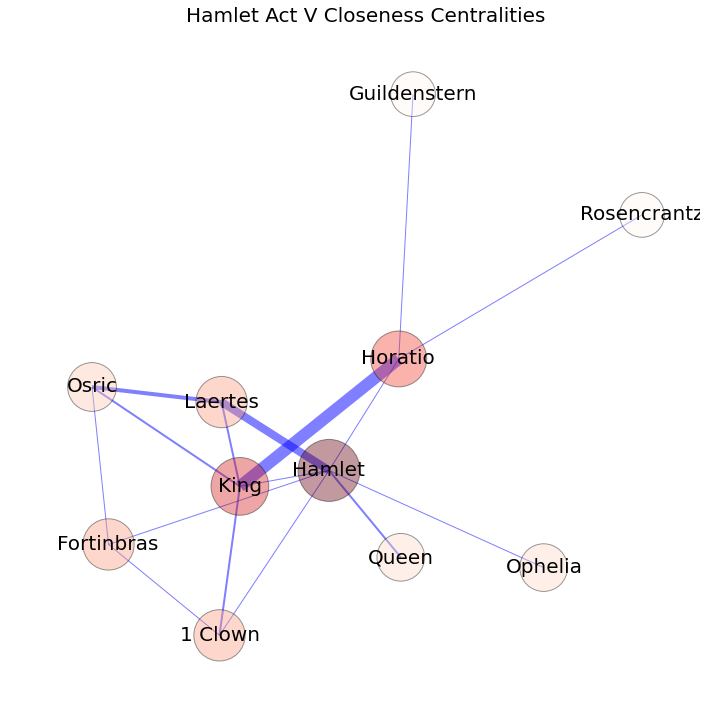

In [127]:
G = graph_dic[ract_dic[cnum[4]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
cl = nx.closeness_centrality(G)
cls={}
for k,v in cl.items():
    cls[v]=k
for k in sorted(cls,reverse=True):
    print labels[cls[k]], 'has closeness centrality', k
pos=pos_dict[4]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=cl.keys(),
                       node_size = [d*5000 for d in cl.values()],node_color=cl.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Hamlet Act V Closeness Centralities",fontsize=20)
kk=plt.axis('off')

King has closeness centrality 0.724137931034
Hamlet has closeness centrality 0.7
Horatio has closeness centrality 0.583333333333
Fortinbras has closeness centrality 0.552631578947
Rosencrantz has closeness centrality 0.538461538462
Ophelia has closeness centrality 0.525
Guildenstern has closeness centrality 0.512195121951
1 Clown has closeness centrality 0.488372093023
Queen has closeness centrality 0.477272727273
Voltimand has closeness centrality 0.446808510638
Ghost has closeness centrality 0.42
Sailor has closeness centrality 0.375
Captain has closeness centrality 0.362068965517
Reynaldo has closeness centrality 0.35593220339
Francisco has closeness centrality 0.328125


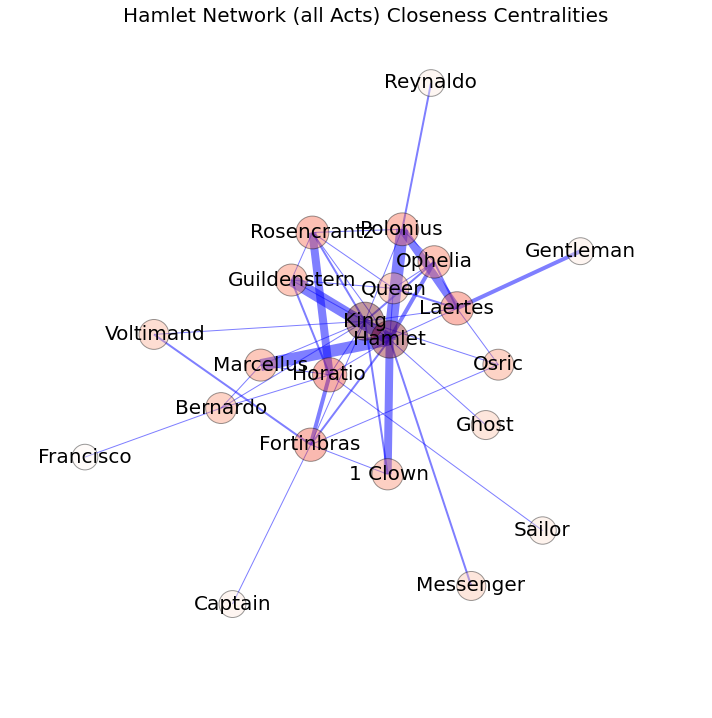

In [128]:
G=plot_total_graph_with_weights(graph_dic,nodper_dic)
weights={(nd[0],nd[1]):str(nd[2]['weight']) for nd in G.edges(data=True)}
# G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
cl = nx.closeness_centrality(G)
cls={}
for k,v in cl.items():
    cls[v]=k
for k in sorted(cls,reverse=True):
    print labels[cls[k]], 'has closeness centrality', k
pos=pos_dict[5]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=cl.keys(),
                       node_size = [d*2000 for d in cl.values()],node_color=cl.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Hamlet Network (all Acts) Closeness Centralities",fontsize=20)
kk=plt.axis('off')

### Betweenness Centrality

Hamlet has betweenness centrality 0.437373737374
King has betweenness centrality 0.37803030303
Bernardo has betweenness centrality 0.174242424242
Horatio has betweenness centrality 0.0856060606061
Marcellus has betweenness centrality 0.0439393939394
Polonius has betweenness centrality 0.0199494949495
Fortinbras has betweenness centrality 0.00757575757576
Queen has betweenness centrality 0.0


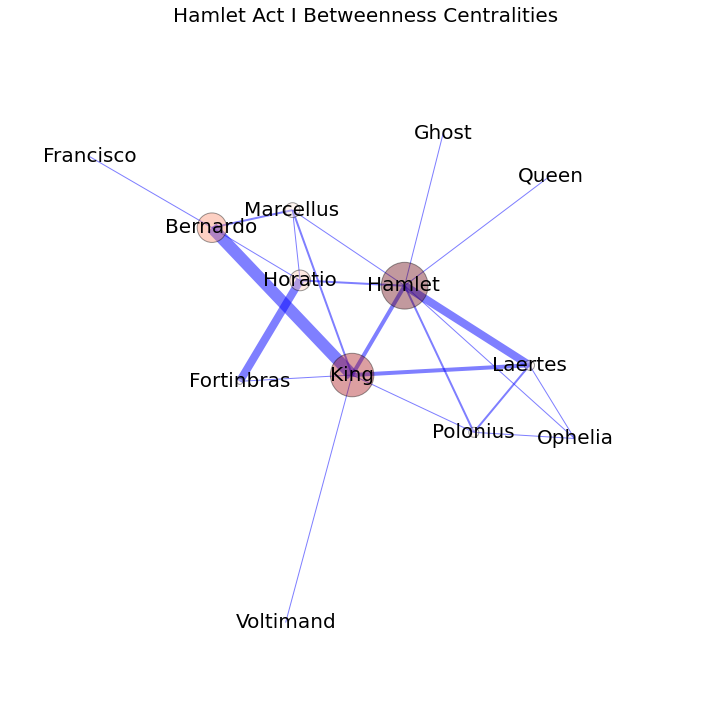

In [129]:
G = graph_dic[ract_dic[cnum[0]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
bc = nx.betweenness_centrality(G)
bcs={}
for k,v in bc.items():
    bcs[v]=k
for k in sorted(bcs,reverse=True):
    print labels[bcs[k]], 'has betweenness centrality', k
pos=pos_dict[0]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=bc.keys(),
                       node_size = [d*5000 for d in bc.values()],node_color=bc.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Hamlet Act I Betweenness Centralities",fontsize=20)
kk=plt.axis('off')

Hamlet has betweenness centrality 0.189814814815
Polonius has betweenness centrality 0.180555555556
Rosencrantz has betweenness centrality 0.0925925925926
Guildenstern has betweenness centrality 0.00925925925926
Queen has betweenness centrality 0.0


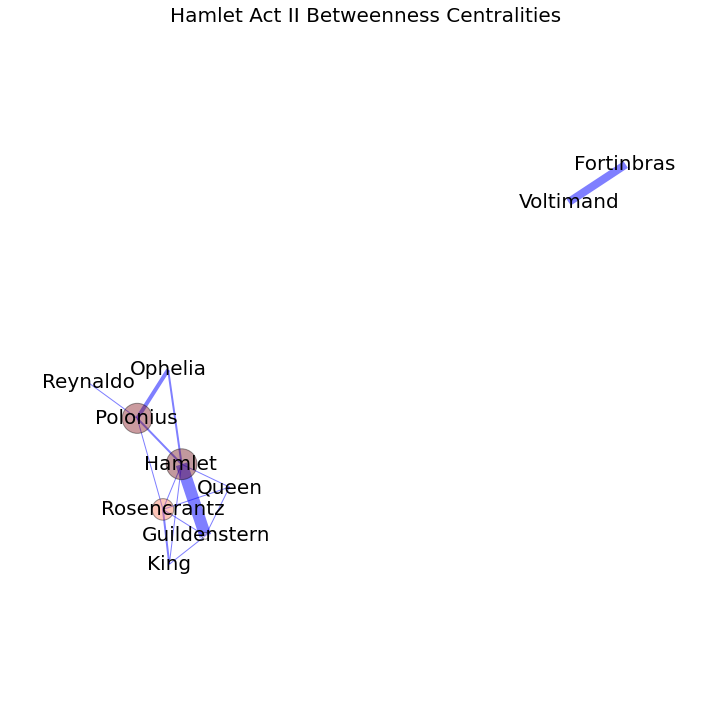

In [130]:
G = graph_dic[ract_dic[cnum[1]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
bc = nx.betweenness_centrality(G)
bcs={}
for k,v in bc.items():
    bcs[v]=k
for k in sorted(bcs,reverse=True):
    print labels[bcs[k]], 'has betweenness centrality', k
pos=pos_dict[1]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=bc.keys(),
                       node_size = [d*5000 for d in bc.values()],node_color=bc.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Hamlet Act II Betweenness Centralities",fontsize=20)
kk=plt.axis('off')

Hamlet has betweenness centrality 0.666666666667
Ophelia has betweenness centrality 0.0666666666667
Queen has betweenness centrality 0.0


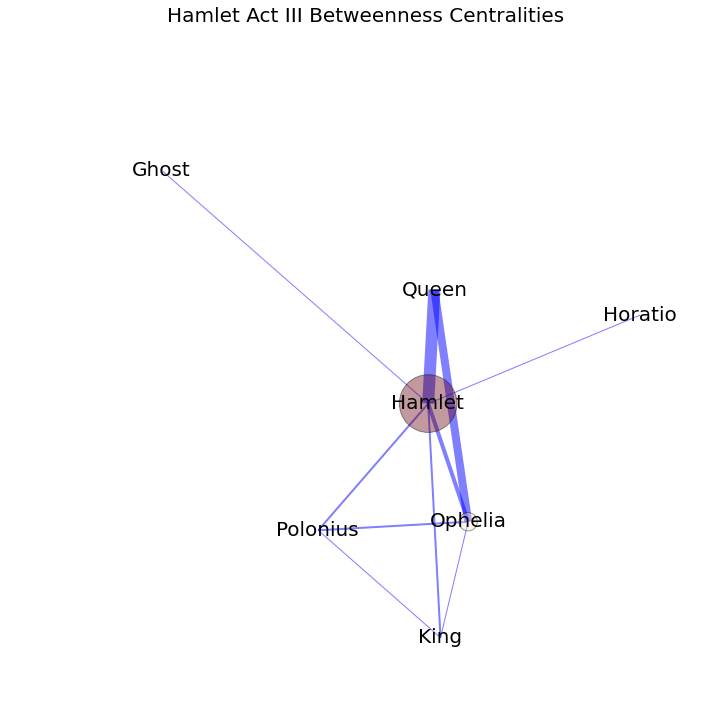

In [131]:
G = graph_dic[ract_dic[cnum[2]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
bc = nx.betweenness_centrality(G)
bcs={}
for k,v in bc.items():
    bcs[v]=k
for k in sorted(bcs,reverse=True):
    print labels[bcs[k]], 'has betweenness centrality', k
pos=pos_dict[2]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=bc.keys(),
                       node_size = [d*5000 for d in bc.values()],node_color=bc.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Hamlet Act III Betweenness Centralities",fontsize=20)
kk=plt.axis('off')

King has betweenness centrality 0.538461538462
Guildenstern has betweenness centrality 0.307692307692
Laertes has betweenness centrality 0.179487179487
Hamlet has betweenness centrality 0.128205128205
Ophelia has betweenness centrality 0.0512820512821
Captain has betweenness centrality 0.0


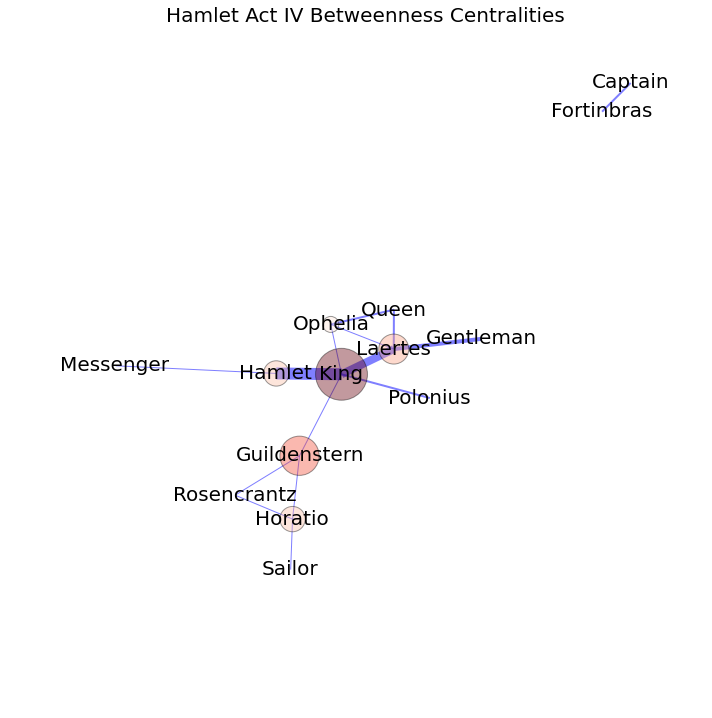

In [132]:
G = graph_dic[ract_dic[cnum[3]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
bc = nx.betweenness_centrality(G)
bcs={}
for k,v in bc.items():
    bcs[v]=k
for k in sorted(bcs,reverse=True):
    print labels[bcs[k]], 'has betweenness centrality', k
pos=pos_dict[3]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=bc.keys(),
                       node_size = [d*5000 for d in bc.values()],node_color=bc.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Hamlet Act IV Betweenness Centralities",fontsize=20)
kk=plt.axis('off')

Hamlet has betweenness centrality 0.540740740741
Horatio has betweenness centrality 0.377777777778
King has betweenness centrality 0.177777777778
Fortinbras has betweenness centrality 0.0333333333333
Laertes has betweenness centrality 0.0222222222222
Osric has betweenness centrality 0.0185185185185
1 Clown has betweenness centrality 0.00740740740741
Queen has betweenness centrality 0.0


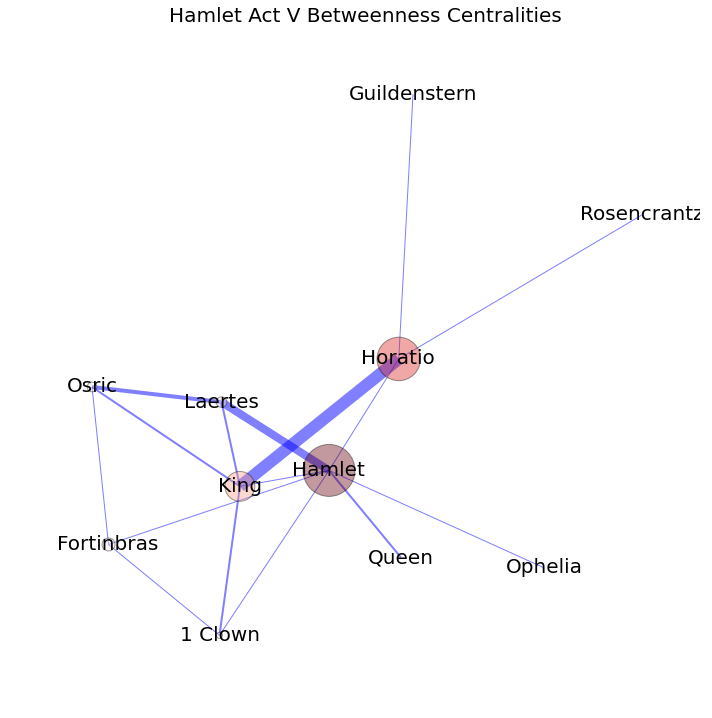

In [133]:
G = graph_dic[ract_dic[cnum[4]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
bc = nx.betweenness_centrality(G)
bcs={}
for k,v in bc.items():
    bcs[v]=k
for k in sorted(bcs,reverse=True):
    print labels[bcs[k]], 'has betweenness centrality', k
pos=pos_dict[4]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=bc.keys(),
                       node_size = [d*5000 for d in bc.values()],node_color=bc.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Hamlet Act V Betweenness Centralities",fontsize=20)
kk=plt.axis('off')

Hamlet has betweenness centrality 0.315634920635
King has betweenness centrality 0.30171957672
Horatio has betweenness centrality 0.139682539683
Fortinbras has betweenness centrality 0.127777777778
Laertes has betweenness centrality 0.11708994709
Polonius has betweenness centrality 0.0988095238095
Bernardo has betweenness centrality 0.0952380952381
Rosencrantz has betweenness centrality 0.0189417989418
Marcellus has betweenness centrality 0.010582010582
Queen has betweenness centrality 0.00833333333333
Guildenstern has betweenness centrality 0.00703703703704
Osric has betweenness centrality 0.00634920634921
Ophelia has betweenness centrality 0.00518518518519
Captain has betweenness centrality 0.0


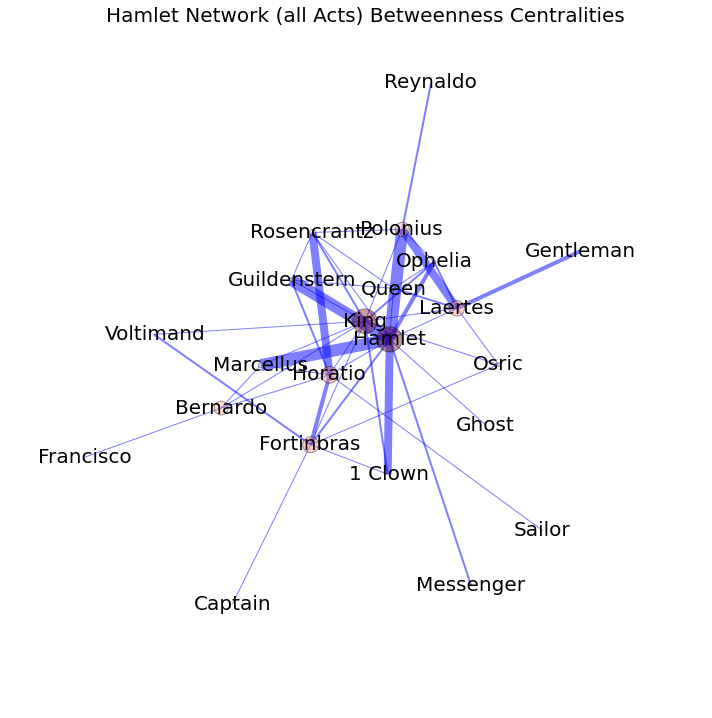

In [134]:
G=plot_total_graph_with_weights(graph_dic,nodper_dic)
weights={(nd[0],nd[1]):str(nd[2]['weight']) for nd in G.edges(data=True)}
# G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
bc = nx.betweenness_centrality(G)
bcs={}
for k,v in bc.items():
    bcs[v]=k
for k in sorted(bcs,reverse=True):
    print labels[bcs[k]], 'has betweenness centrality', k
pos=pos_dict[5]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=bc.keys(),
                       node_size = [d*2000 for d in bc.values()],node_color=bc.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Hamlet Network (all Acts) Betweenness Centralities",fontsize=20)
kk=plt.axis('off')

### Eigenvector Centrality

Hamlet has eigenvector centrality 0.586657192534
Horatio has eigenvector centrality 0.567302565082
Bernardo has eigenvector centrality 0.319650308957
King has eigenvector centrality 0.298508255403
Marcellus has eigenvector centrality 0.287356141577
Fortinbras has eigenvector centrality 0.164082022498
Ghost has eigenvector centrality 0.100751621333
Polonius has eigenvector centrality 0.0936860126891
Queen has eigenvector centrality 0.0671677475552
Laertes has eigenvector centrality 0.0619206054914
Francisco has eigenvector centrality 0.054896237762
Ophelia has eigenvector centrality 0.0513997458561
Voltimand has eigenvector centrality 0.0170886121594


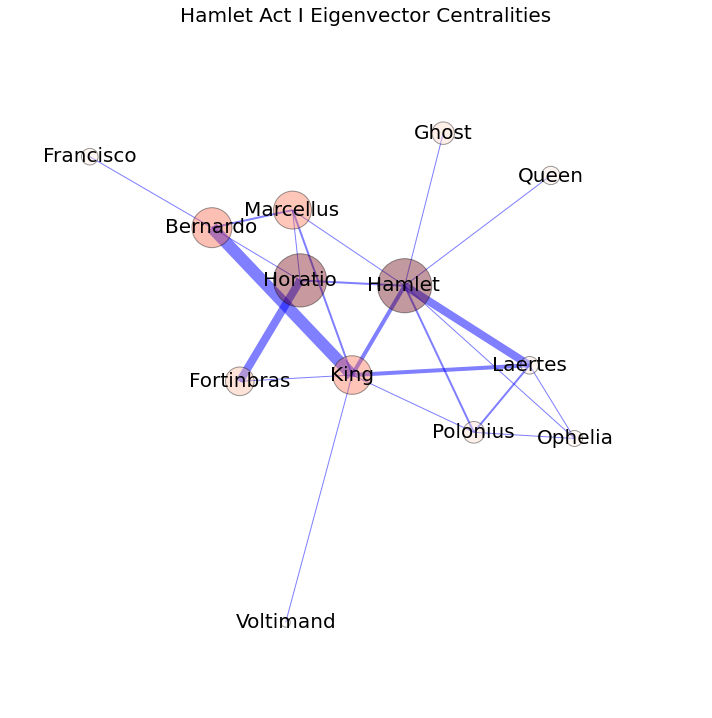

In [135]:
G = graph_dic[ract_dic[cnum[0]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
ec = nx.eigenvector_centrality(G)
ecs={}
for k,v in ec.items():
    ecs[v]=k
for k in sorted(ecs,reverse=True):
    print labels[ecs[k]], 'has eigenvector centrality', k
pos=pos_dict[0]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=ec.keys(),
                       node_size = [d*5000 for d in ec.values()],node_color=ec.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Hamlet Act I Eigenvector Centralities",fontsize=20)
kk=plt.axis('off')

Hamlet has eigenvector centrality 0.536936939587
Polonius has eigenvector centrality 0.467706666597
Guildenstern has eigenvector centrality 0.348368996742
Rosencrantz has eigenvector centrality 0.339157814164
King has eigenvector centrality 0.293407601322
Queen has eigenvector centrality 0.270298917527
Ophelia has eigenvector centrality 0.225941191715
Reynaldo has eigenvector centrality 0.215316670707
Fortinbras has eigenvector centrality 1.19833688944e-29


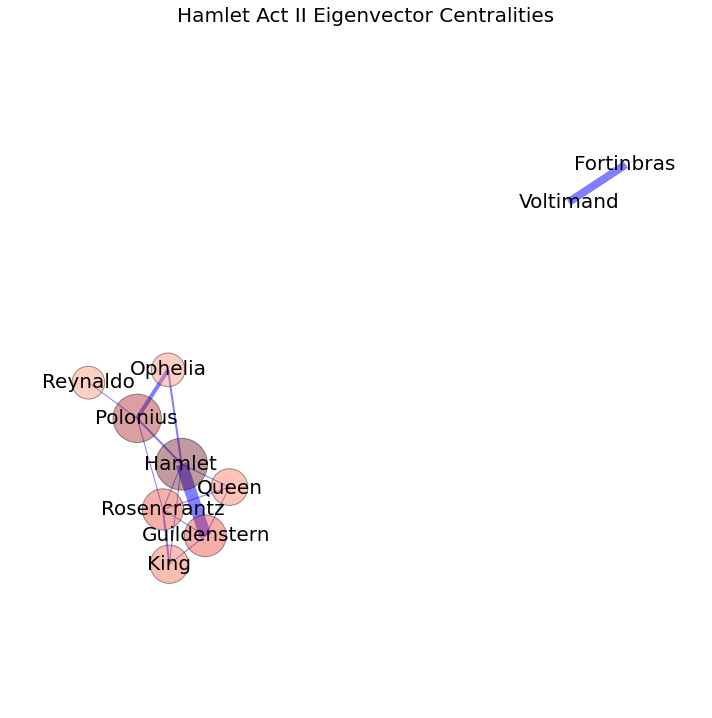

In [136]:
G = graph_dic[ract_dic[cnum[1]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
ec = nx.eigenvector_centrality(G)
ecs={}
for k,v in ec.items():
    ecs[v]=k
for k in sorted(ecs,reverse=True):
    print labels[ecs[k]], 'has eigenvector centrality', k
pos=pos_dict[1]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=ec.keys(),
                       node_size = [d*5000 for d in ec.values()],node_color=ec.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Hamlet Act II Eigenvector Centralities",fontsize=20)
kk=plt.axis('off')

Hamlet has eigenvector centrality 0.657440769113
Queen has eigenvector centrality 0.484185668111
Ophelia has eigenvector centrality 0.344882612105
Polonius has eigenvector centrality 0.338981264407
King has eigenvector centrality 0.25927315506
Horatio has eigenvector centrality 0.170396279586
Ghost has eigenvector centrality 0.0567987598619


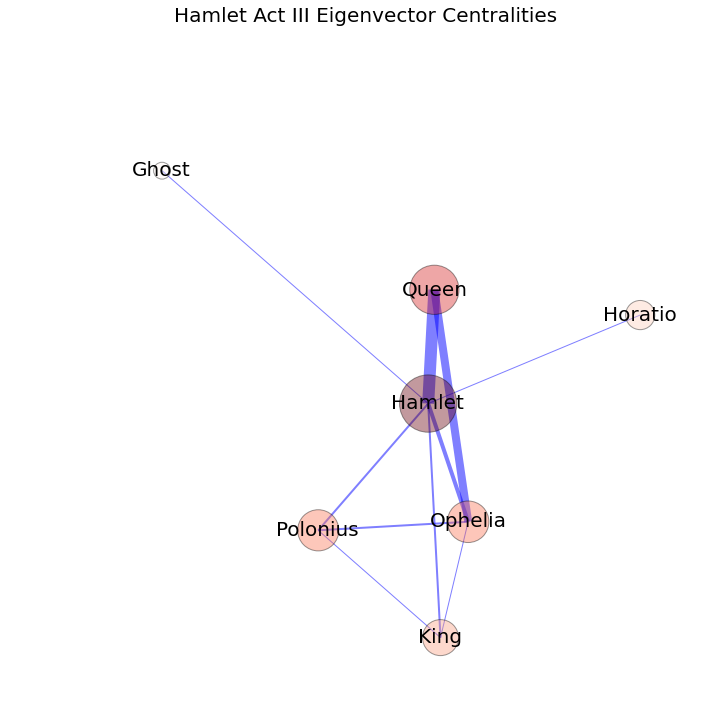

In [137]:
G = graph_dic[ract_dic[cnum[2]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
ec = nx.eigenvector_centrality(G)
ecs={}
for k,v in ec.items():
    ecs[v]=k
for k in sorted(ecs,reverse=True):
    print labels[ecs[k]], 'has eigenvector centrality', k
pos=pos_dict[2]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=ec.keys(),
                       node_size = [d*5000 for d in ec.values()],node_color=ec.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Hamlet Act III Eigenvector Centralities",fontsize=20)
kk=plt.axis('off')

King has eigenvector centrality 0.685894783704
Hamlet has eigenvector centrality 0.579844378452
Laertes has eigenvector centrality 0.400541058932
Gentleman has eigenvector centrality 0.104987927032
Polonius has eigenvector centrality 0.0898929881678
Ophelia has eigenvector centrality 0.0794377600967
Queen has eigenvector centrality 0.062904937603
Guildenstern has eigenvector centrality 0.0453803142703
Messenger has eigenvector centrality 0.0379965469316
Horatio has eigenvector centrality 0.00342223362521
Rosencrantz has eigenvector centrality 0.00319797585099
Sailor has eigenvector centrality 0.000224257774225
Fortinbras has eigenvector centrality 7.24184381223e-167
Captain has eigenvector centrality 5.65426078745e-167


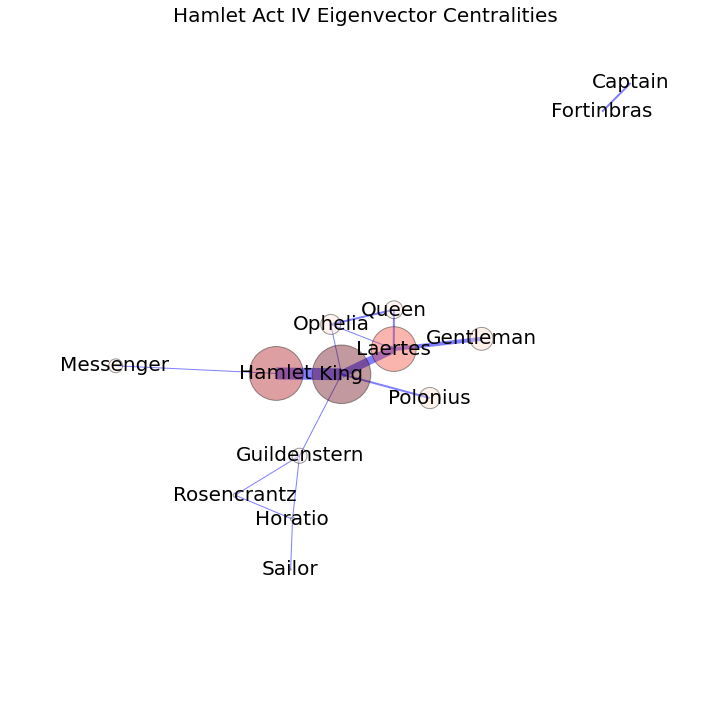

In [139]:
G = graph_dic[ract_dic[cnum[3]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
ec = nx.eigenvector_centrality(G,max_iter=1000)
ecs={}
for k,v in ec.items():
    ecs[v]=k
for k in sorted(ecs,reverse=True):
    print labels[ecs[k]], 'has eigenvector centrality', k
pos=pos_dict[3]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=ec.keys(),
                       node_size = [d*5000 for d in ec.values()],node_color=ec.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Hamlet Act IV Eigenvector Centralities",fontsize=20)
kk=plt.axis('off')

Hamlet has eigenvector centrality 0.776924739729
Horatio has eigenvector centrality 0.360380157565
Laertes has eigenvector centrality 0.344687290001
King has eigenvector centrality 0.248135604528
Queen has eigenvector centrality 0.243478565357
Osric has eigenvector centrality 0.0917340774039
1 Clown has eigenvector centrality 0.084141248106
Fortinbras has eigenvector centrality 0.0774391805066
Ophelia has eigenvector centrality 0.0695653043878
Guildenstern has eigenvector centrality 0.0161341885087


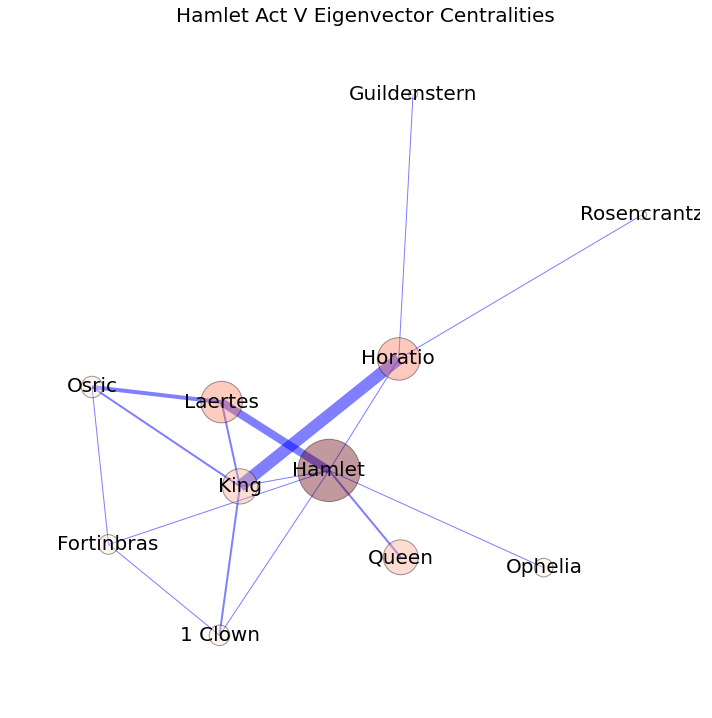

In [140]:
G = graph_dic[ract_dic[cnum[4]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
ec = nx.eigenvector_centrality(G)
ecs={}
for k,v in ec.items():
    ecs[v]=k
for k in sorted(ecs,reverse=True):
    print labels[ecs[k]], 'has eigenvector centrality', k
pos=pos_dict[4]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=ec.keys(),
                       node_size = [d*5000 for d in ec.values()],node_color=ec.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Hamlet Act V Eigenvector Centralities",fontsize=20)
kk=plt.axis('off')

Hamlet has eigenvector centrality 0.705832258096
King has eigenvector centrality 0.445281969905
Horatio has eigenvector centrality 0.324279279276
Queen has eigenvector centrality 0.258887072416
Laertes has eigenvector centrality 0.230715547543
Polonius has eigenvector centrality 0.171083869781
Ophelia has eigenvector centrality 0.160006865714
Guildenstern has eigenvector centrality 0.0671922674423
Fortinbras has eigenvector centrality 0.0669962963952
Marcellus has eigenvector centrality 0.0602279208912
Bernardo has eigenvector centrality 0.0530438346029
Ghost has eigenvector centrality 0.0505139718879
Rosencrantz has eigenvector centrality 0.0502636169415
1 Clown has eigenvector centrality 0.034422586601
Osric has eigenvector centrality 0.0298051240992
Gentleman has eigenvector centrality 0.0165116187538
Messenger has eigenvector centrality 0.012628492972
Reynaldo has eigenvector centrality 0.00918299765954
Voltimand has eigenvector centrality 0.00916560065703
Sailor has eigenvector ce

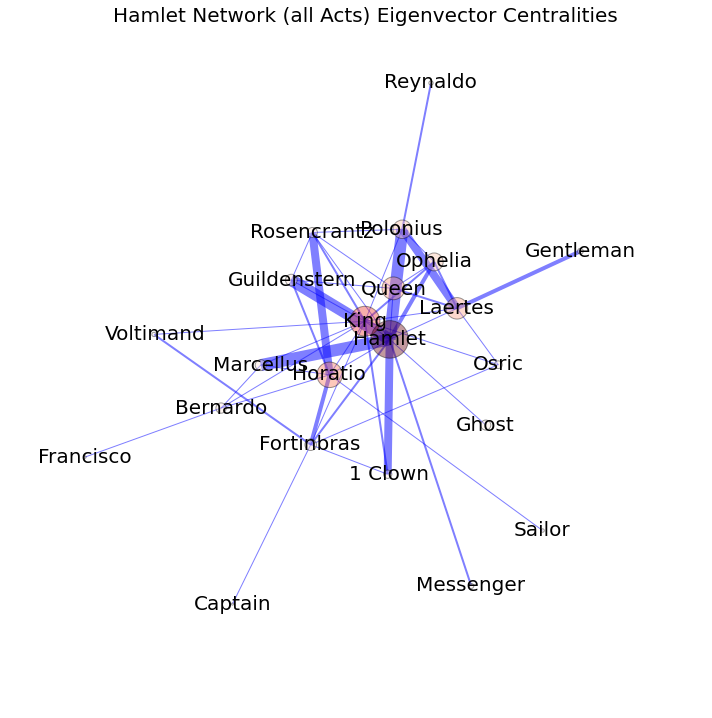

In [141]:
G=plot_total_graph_with_weights(graph_dic,nodper_dic)
weights={(nd[0],nd[1]):str(nd[2]['weight']) for nd in G.edges(data=True)}
# G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
ec = nx.eigenvector_centrality(G)
ecs={}
for k,v in ec.items():
    ecs[v]=k
for k in sorted(ecs,reverse=True):
    print labels[ecs[k]], 'has eigenvector centrality', k
pos=pos_dict[5]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=ec.keys(),
                       node_size = [d*2000 for d in ec.values()],node_color=ec.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Hamlet Network (all Acts) Eigenvector Centralities",fontsize=20)
kk=plt.axis('off')

### PageRank

Hamlet has PageRank 0.221513056003
Horatio has PageRank 0.168945221744
King has PageRank 0.113605391838
Bernardo has PageRank 0.108387357949
Marcellus has PageRank 0.0785327602501
Polonius has PageRank 0.0568229091738
Ophelia has PageRank 0.0509426424447
Laertes has PageRank 0.0500824832128
Fortinbras has PageRank 0.048309359116
Ghost has PageRank 0.0303673303958
Francisco has PageRank 0.0299646097877
Queen has PageRank 0.0240910407767
Voltimand has PageRank 0.0184358373082


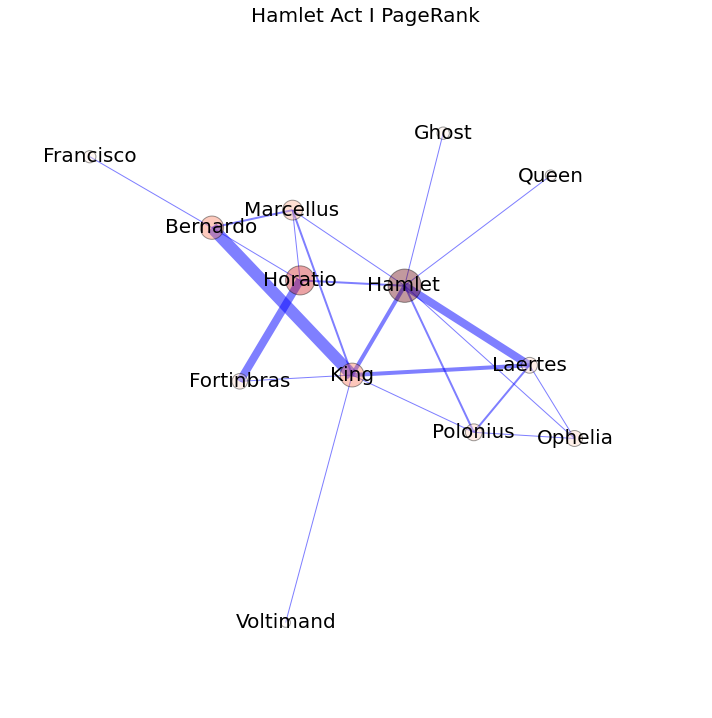

In [144]:
G = graph_dic[ract_dic[cnum[0]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
pr = nx.pagerank(G)
prs={}
for k,v in pr.items():
    prs[v]=k
for k in sorted(prs,reverse=True):
    print labels[prs[k]], 'has PageRank', k
pos=pos_dict[0]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=pr.keys(),
                       node_size = [d*5000 for d in pr.values()],node_color=pr.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Hamlet Act I PageRank",fontsize=20)
kk=plt.axis('off')

Hamlet has PageRank 0.164231707658
Polonius has PageRank 0.154307683384
Rosencrantz has PageRank 0.102989586893
Guildenstern has PageRank 0.102451408954
Fortinbras has PageRank 0.1
King has PageRank 0.0871676595331
Queen has PageRank 0.0720231682803
Reynaldo has PageRank 0.0587215357729
Ophelia has PageRank 0.0581072495244


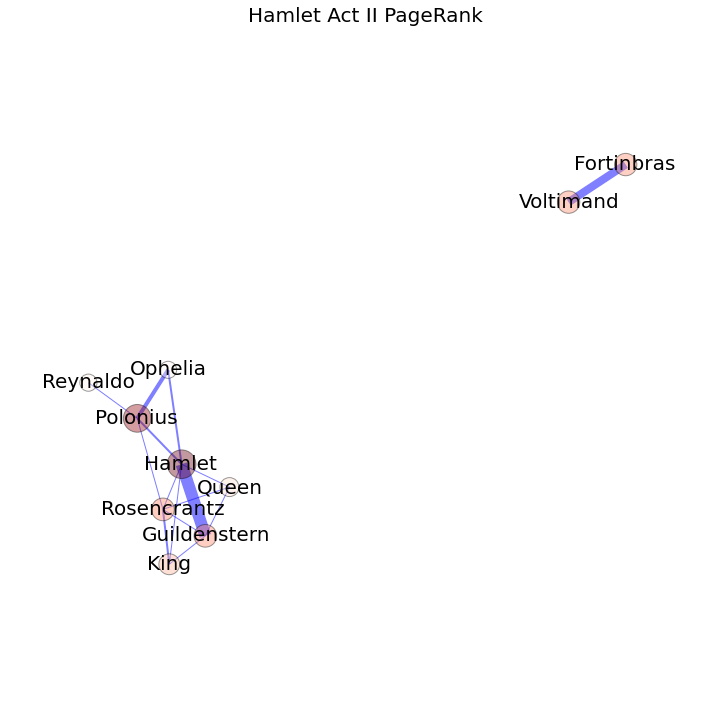

In [145]:
G = graph_dic[ract_dic[cnum[1]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
pr = nx.pagerank(G)
prs={}
for k,v in pr.items():
    prs[v]=k
for k in sorted(prs,reverse=True):
    print labels[prs[k]], 'has PageRank', k
pos=pos_dict[1]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=pr.keys(),
                       node_size = [d*5000 for d in pr.values()],node_color=pr.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Hamlet Act II PageRank",fontsize=20)
kk=plt.axis('off')

Hamlet has PageRank 0.36201703841
Ophelia has PageRank 0.150445372223
Queen has PageRank 0.147534355077
Polonius has PageRank 0.135041975987
King has PageRank 0.106155596314
Horatio has PageRank 0.0633899607779
Ghost has PageRank 0.0354157012117


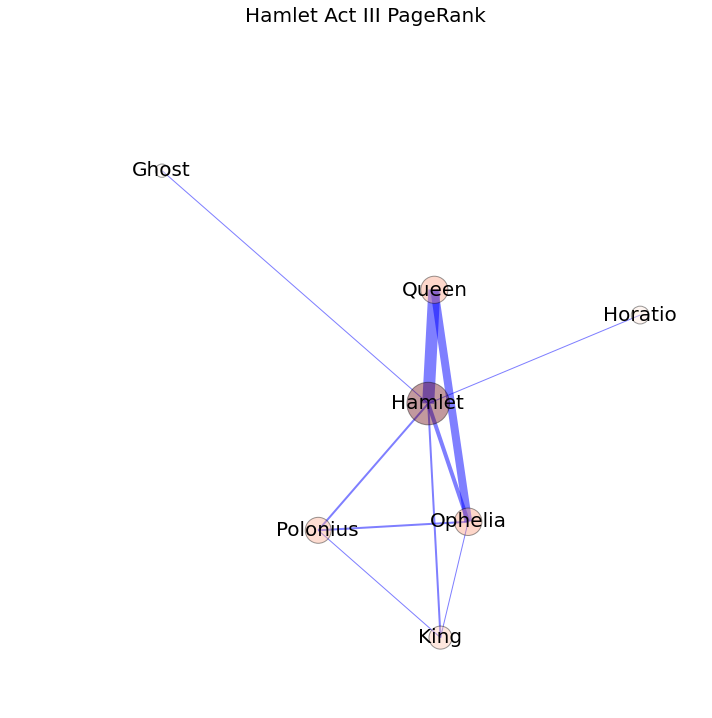

In [146]:
G = graph_dic[ract_dic[cnum[2]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
pr = nx.pagerank(G)
prs={}
for k,v in pr.items():
    prs[v]=k
for k in sorted(prs,reverse=True):
    print labels[prs[k]], 'has PageRank', k
pos=pos_dict[2]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=pr.keys(),
                       node_size = [d*5000 for d in pr.values()],node_color=pr.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Hamlet Act III PageRank",fontsize=20)
kk=plt.axis('off')

King has PageRank 0.205638171901
Laertes has PageRank 0.131838403458
Hamlet has PageRank 0.12078192797
Horatio has PageRank 0.09198283944
Fortinbras has PageRank 0.0843465043942
Captain has PageRank 0.0585106384629
Guildenstern has PageRank 0.05730610952
Rosencrantz has PageRank 0.0464982114041
Queen has PageRank 0.0445214493859
Ophelia has PageRank 0.0443892967225
Gentleman has PageRank 0.0405978266631
Sailor has PageRank 0.0302611110106
Polonius has PageRank 0.0252799839447
Messenger has PageRank 0.018047525723


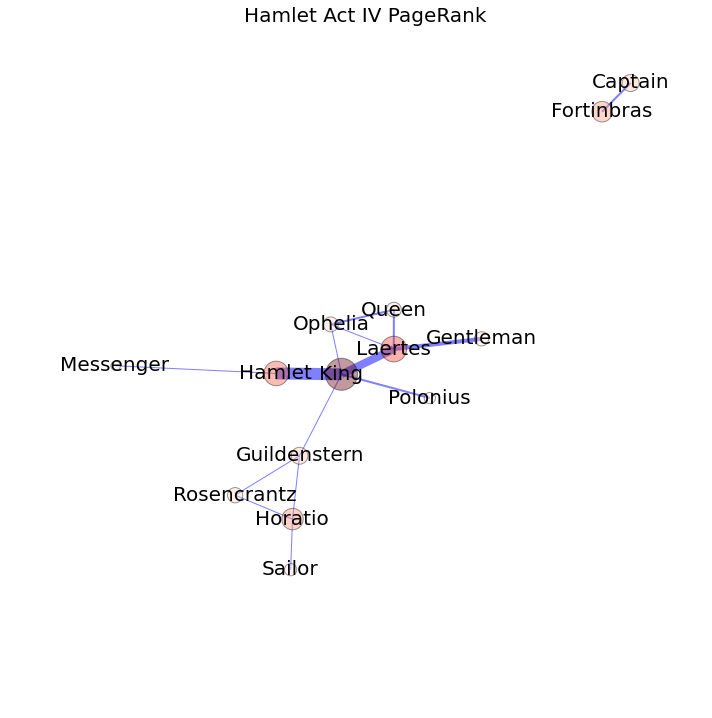

In [147]:
G = graph_dic[ract_dic[cnum[3]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
pr = nx.pagerank(G)
prs={}
for k,v in pr.items():
    prs[v]=k
for k in sorted(prs,reverse=True):
    print labels[prs[k]], 'has PageRank', k
pos=pos_dict[3]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=pr.keys(),
                       node_size = [d*5000 for d in pr.values()],node_color=pr.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Hamlet Act IV PageRank",fontsize=20)
kk=plt.axis('off')

Hamlet has PageRank 0.377759032097
Horatio has PageRank 0.126614105172
Laertes has PageRank 0.122050672377
King has PageRank 0.0871150281349
Osric has PageRank 0.0650987386154
Queen has PageRank 0.0614586371881
Fortinbras has PageRank 0.0445930305121
1 Clown has PageRank 0.0441807771958
Ophelia has PageRank 0.0272998703654
Rosencrantz has PageRank 0.0219150541713


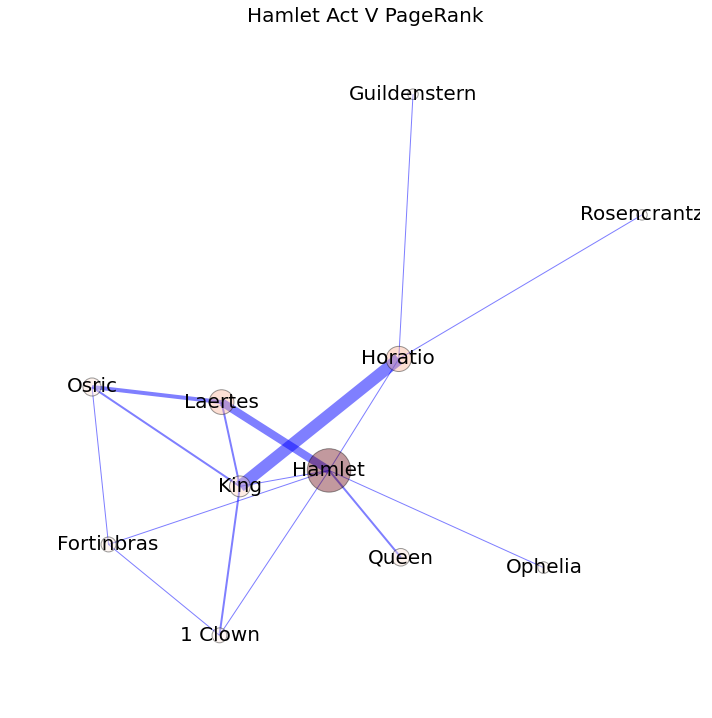

In [148]:
G = graph_dic[ract_dic[cnum[4]]]
G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
pr = nx.pagerank(G)
prs={}
for k,v in pr.items():
    prs[v]=k
for k in sorted(prs,reverse=True):
    print labels[prs[k]], 'has PageRank', k
pos=pos_dict[4]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=pr.keys(),
                       node_size = [d*5000 for d in pr.values()],node_color=pr.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Hamlet Act V PageRank",fontsize=20)
kk=plt.axis('off')

Hamlet has PageRank 0.244821539716
King has PageRank 0.121010133099
Horatio has PageRank 0.103012903221
Laertes has PageRank 0.0764286847864
Polonius has PageRank 0.0562080658309
Queen has PageRank 0.0524197394698
Ophelia has PageRank 0.0479781602959
Fortinbras has PageRank 0.0450771974492
Bernardo has PageRank 0.04338368278
Marcellus has PageRank 0.029562381859
Guildenstern has PageRank 0.025543239853
Rosencrantz has PageRank 0.0238553860945
Osric has PageRank 0.0205790028349
1 Clown has PageRank 0.0146821489016
Gentleman has PageRank 0.0142426773852
Francisco has PageRank 0.0141937125555
Ghost has PageRank 0.0135857128692
Reynaldo has PageRank 0.0125513331945
Captain has PageRank 0.0122919046776
Voltimand has PageRank 0.0112983833761
Sailor has PageRank 0.00876394516917
Messenger has PageRank 0.00851006458093


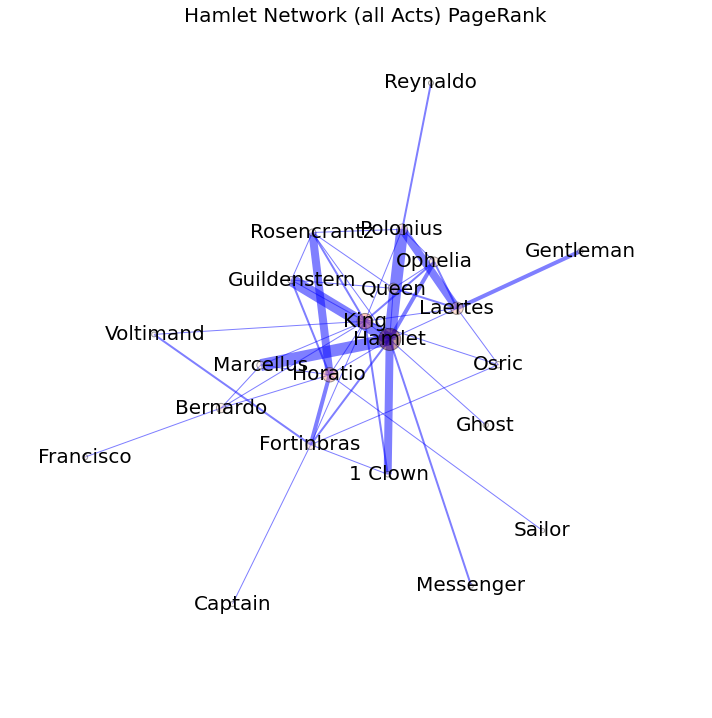

In [149]:
G=plot_total_graph_with_weights(graph_dic,nodper_dic)
weights={(nd[0],nd[1]):str(nd[2]['weight']) for nd in G.edges(data=True)}
# G.remove_nodes_from(nx.isolates(G))
plt.figure(figsize=(12,12))
labels={i:v for v,i in pernode_dict.items() if i in G.nodes()}
pr = nx.pagerank(G)
prs={}
for k,v in pr.items():
    prs[v]=k
for k in sorted(prs,reverse=True):
    print labels[prs[k]], 'has PageRank', k
pos=pos_dict[5]
edgewidth=[]
for (u,v,d) in GI.edges(data=True):
    edgewidth.append(d['weight'])
nx.draw_networkx_nodes(G,pos=pos,with_labels=False,nodelist=pr.keys(),
                       node_size = [d*2000 for d in pr.values()],node_color=pr.values(),
                       cmap=plt.cm.Reds,alpha=0.4)
labe=nx.draw_networkx_labels(G,pos=pos,labels=labels,font_size=20)
nx.draw_networkx_edges(G,pos=pos,edge_color='b',width=edgewidth, alpha=0.5)#,edge_labels=weights,label_pos=.2)
plt.title("Hamlet Network (all Acts) PageRank",fontsize=20)
kk=plt.axis('off')